In [1]:
import numpy as np 
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from matplotlib import pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Using TensorFlow backend.


In [2]:
from keras.utils import to_categorical
img_rows, img_cols = 32, 32


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

input_shape = (img_rows, img_cols, 3)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [6]:
hist = model.fit(x_train, y_train,
          batch_size=50,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 378s - loss: 1.7028 - acc: 0.3982 - val_loss: 1.5885 - val_acc: 0.4817
Epoch 2/10
50000/50000 [==============================] - 368s - loss: 1.3409 - acc: 0.5265 - val_loss: 1.2306 - val_acc: 0.5585
Epoch 3/10
50000/50000 [==============================] - 367s - loss: 1.2064 - acc: 0.5757 - val_loss: 1.2937 - val_acc: 0.5519
Epoch 4/10
50000/50000 [==============================] - 172s - loss: 1.1009 - acc: 0.6140 - val_loss: 1.1665 - val_acc: 0.5961
Epoch 5/10
50000/50000 [==============================] - 179s - loss: 1.0404 - acc: 0.6362 - val_loss: 1.0509 - val_acc: 0.6355
Epoch 6/10
50000/50000 [==============================] - 217s - loss: 0.9886 - acc: 0.6561 - val_loss: 1.0206 - val_acc: 0.6679
Epoch 7/10
50000/50000 [==============================] - 186s - loss: 0.9435 - acc: 0.6719 - val_loss: 0.8526 - val_acc: 0.7053
Epoch 8/10
50000/50000 [=======================

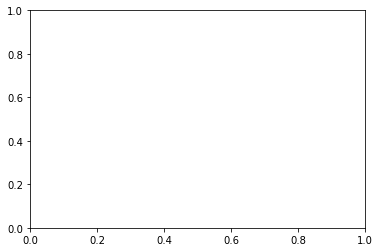

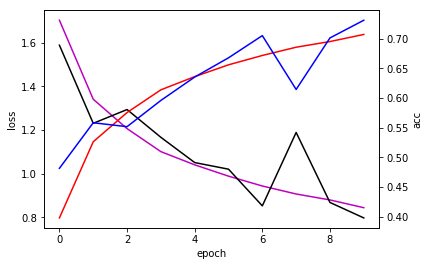

In [8]:
fig, loss_plt = plt.subplots()

acc_plt = loss_plt.twinx()

loss_plt.plot(hist.history['loss'], 'm')
loss_plt.plot(hist.history['val_loss'], 'k')

acc_plt.plot(hist.history['acc'], 'r' )
acc_plt.plot(hist.history['val_acc'], 'b')

loss_plt.set_xlabel('epoch')
loss_plt.set_ylabel('loss')
acc_plt.set_ylabel('acc')



plt.show()